# Distribution Plots
Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

- distplot
- jointplot
- pairplot
- rugplot
- kdeplot

In [1]:
import seaborn as sns
%matplotlib inline

## Data
Seaborn comes with built-in data sets!

In [2]:
tips = sns.load_dataset('tips')
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 1- distplot
The distplot shows the distribution of a univariate (only one variable) set of observations.

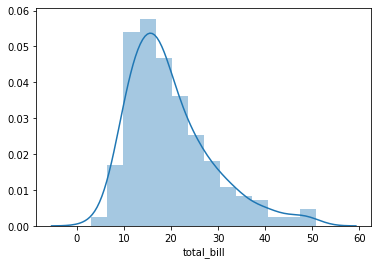

In [3]:
sns.distplot(tips['total_bill'])

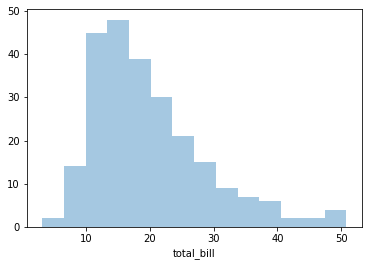

In [4]:
# there are additional things to do with that plot <look at the availabel arguments for the sns.distplt()>
# the curve above is called KDE and you can remove it by arg: kde=False
sns.distplot(tips['total_bill'], kde=False)

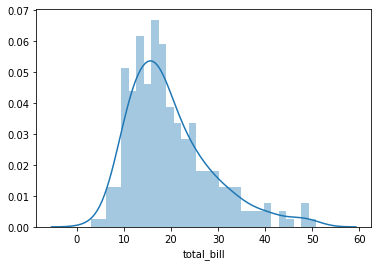

In [5]:
# to get more informations you can change the number of bins
sns.distplot(tips['total_bill'], kde=True, bins=30)

## 2- Jointplot
jointplot() allows you to basically match up two distplots for bivariate data(more than one variable at the same time). With your choice of what kind parameter to compare with:

- “scatter”
- “reg”
- “resid”
- “kde”
- “hex”

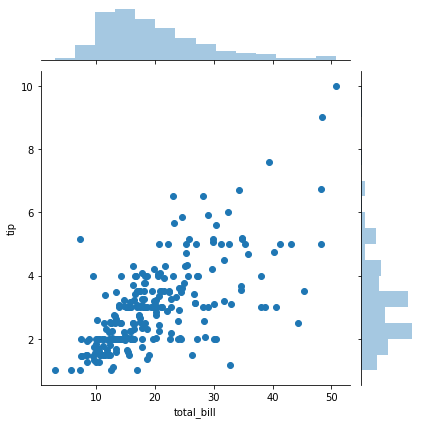

In [6]:
# sns.jointplot(x='column_one_name', y='column_two_name', data='dataset_name')
# column_one and column_two are the two columns you want to compare them to each other
sns.jointplot(x='total_bill', y='tip', data=tips) # default kind='scatter'

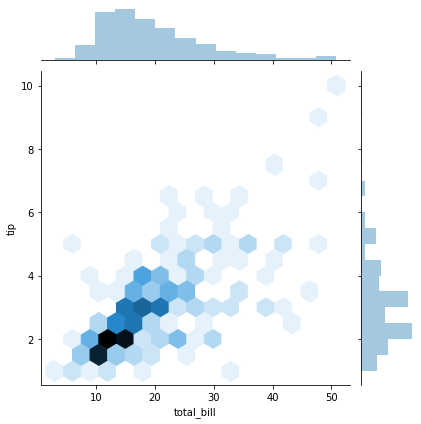

In [7]:
# jointplot allow you as well to add more arguments like for example: kind=type_of_plot
sns.jointplot(x = 'total_bill', y = 'tip', data=tips, kind='hex')
# if the hexagon gets a larg number of points in it, it gets darker and if it gets a smaller number of points it gets lighter

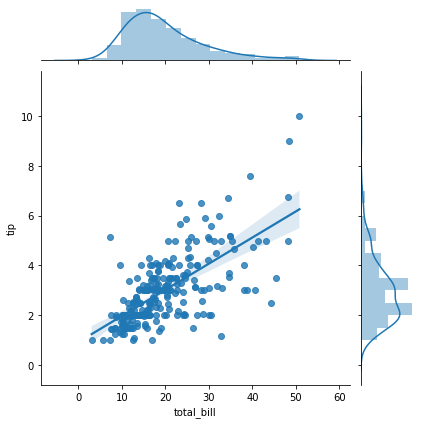

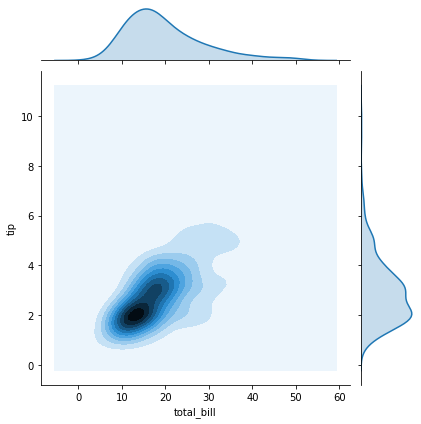

In [8]:
# another kinds of the jointplot
sns.jointplot(x = 'total_bill', y = 'tip', data=tips, kind='reg') # simple scatter plot but with additional regression line (we will discuss linear regression in the future)
sns.jointplot(x = 'total_bill', y = 'tip', data=tips, kind='kde') # shows you the density where these two points match the most

# 3- pairplot (Verrrrrrrry Important One)

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns).
### it basically does the jointplot() for every possible combination of the numerical columns in the dataframe

### making it a realy nice way to visualize your data and even nicer is that you can add hue argument to it

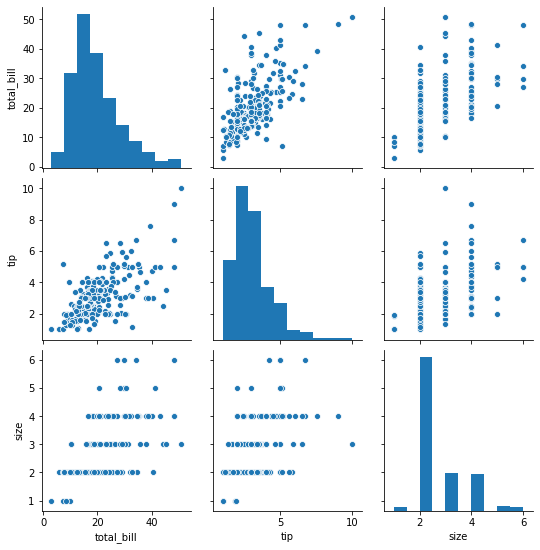

In [9]:
# sns.pairplot(dataframe)
sns.pairplot(tips)
# notice that each plot between the two same columns is a histogram
# while between the different columns is a scatter.

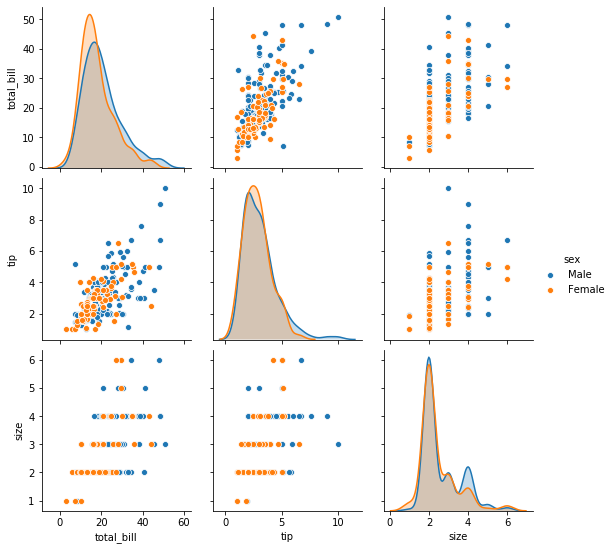

In [10]:
# sns.pairplot(tips, hue='name of the categorical column') to give a hue to the categorical columns
sns.pairplot(tips, hue='sex') # here we are giving a hue to the categorical column called sex.

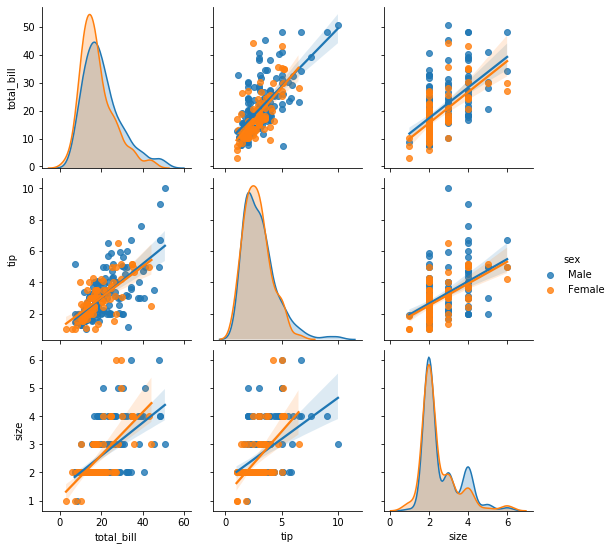

In [11]:
# also you can change the kind in the pair plot but there is only a two options ('scatter', 'reg')
sns.pairplot(tips, hue='sex', kind='reg')

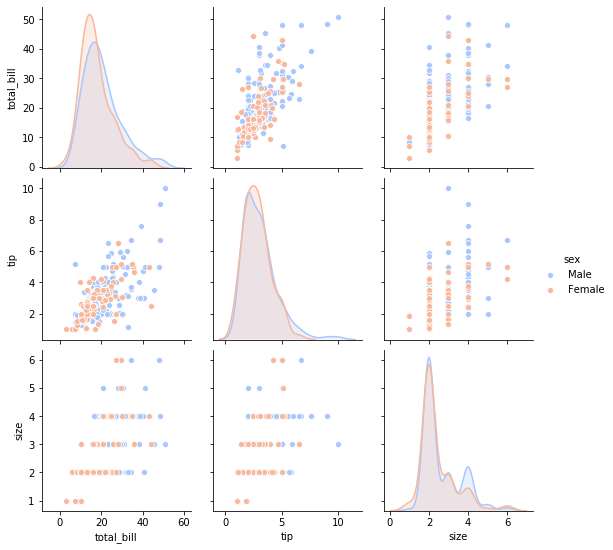

In [12]:
# also you can change the color of the distribution by usning the argument called pallet
# There are six variations of the default theme, called 'deep', 'muted', 'pastel', 'bright', 'dark', and 'colorblind'
# ,'Blues', 'cubehelix', 'coolwarm'
sns.pairplot(tips, hue='sex', palette='coolwarm')

# 4- rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution (only one variable which make it simillar somehow to the `sns.distplot()`) . They are the building block of a KDE plot:

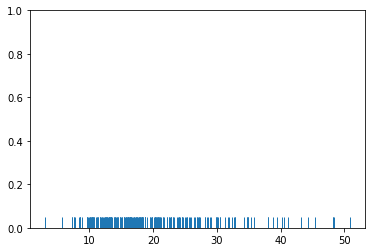

In [13]:
# sns.rugplot(datafram['single_column'])
sns.rugplot(tips['total_bill'])

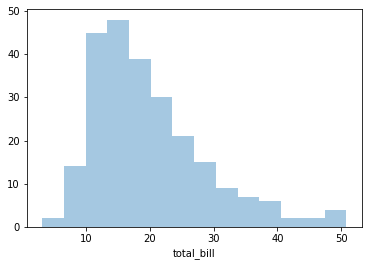

In [14]:
# lets see the distplot again witout the kde
sns.distplot(tips['total_bill'], kde=False)

In [15]:
# now as we know what the rugplot means so:
# how many points are in the tips dataframe
tips.info() # so it is 244 values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


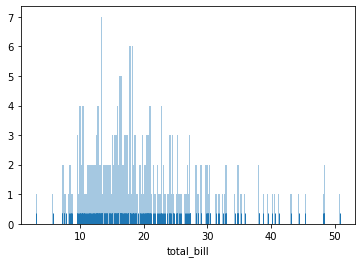

In [16]:
# lets compare both the rugplot and the distplot together
sns.rugplot(tips['total_bill'])
sns.distplot(tips['total_bill'], kde=False, bins=244) # lets make the bins=total_number_of_values_in_tatal_bill_column

## 5- kdeplot
kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

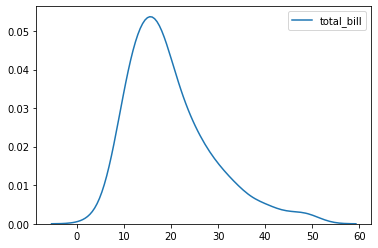

In [17]:
sns.kdeplot(tips['total_bill'])

notice that each noraml-distribution is normalized around blue dashes


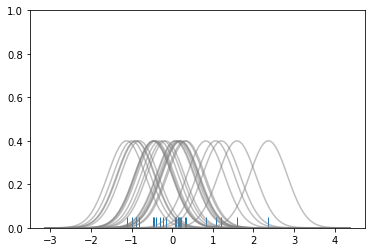

In [18]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)
print('notice that each noraml-distribution is normalized around blue dashes')

Text(0.5, 0.98, 'Sum of the Basis Functions')

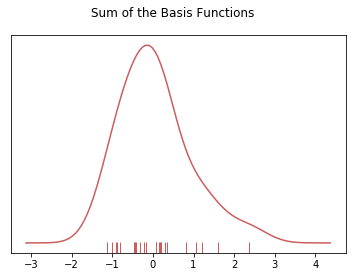

In [19]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

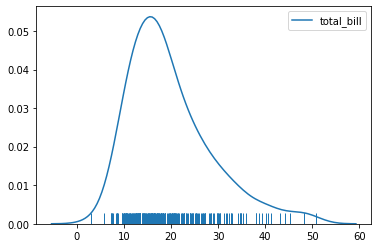

In [20]:
# so with our tips dataset we can do the same thing as follows
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

# ///////////////////////////////////////////////////////////////////////////////////////
# Categorical Data Plots¶

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

- factorplot
- boxplot
- violinplot
- stripplot
- swarmplot
- barplot
- countplot

## first
## barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. barplot is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

## 1- Barplot

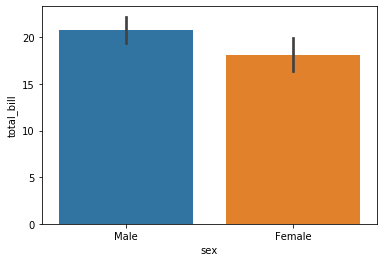

In [21]:
# sns.barplot(x='categorical column' , y='numeric column', data=dataframe)
sns.barplot(x='sex' , y='total_bill', data=tips) # this shows you the average or the mean of 'Total_bill' per categorical column Sex:(female, male)
# averge total_bill of male is slightly higher than the average total_bill of female. >>>>> average == mean

You can change the estimator object to your own function, that converts a vector to a scalar:

In [22]:
# lets take a look at the mean
tips['total_bill'].mean()

19.785942622950824

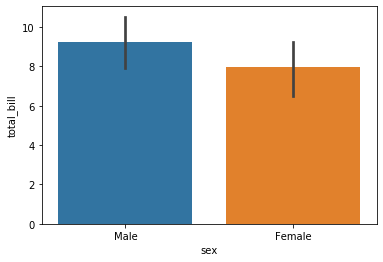

In [23]:
# by default the seaborn sets the estimator to average but you can change this to any estimator you want to apply on the numerical col. of the barplot
import numpy as np # start by importing numpy
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std) # then use numpy methods inside the estimator argument for example std=standered deviation

## 2- countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences (Frequenct) . Which is why we only pass the x value:

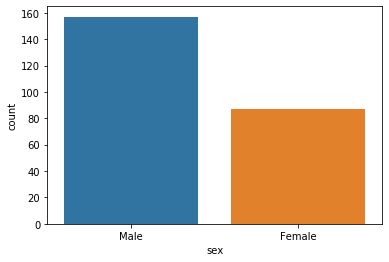

In [24]:
sns.countplot(x='sex', data=tips)

In [25]:
tips['sex'].value_counts() # to get the exact number of males and females.

Male      157
Female     87
Name: sex, dtype: int64

# boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

## 1- BoxPlot

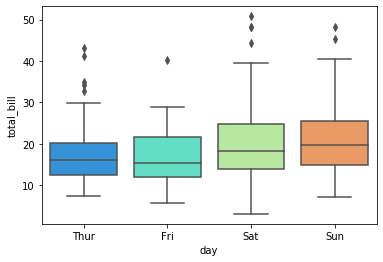

In [26]:
# sns.boxplot(x='categorical data column', y='numerical data column', data=your dataframe, palette_optional)
sns.boxplot(x='day', y='total_bill', data=tips, palette='rainbow')

## explanation of the boxplot:
<img src='./boxplot.jpg' alt='boxplot explanation'/>
<img src='./boxplot_explanation.png' alt='boxplot explanation'/>

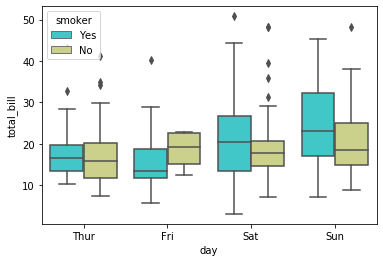

In [27]:
# specifying a hue for a categorical data in the BoxPlot
sns.boxplot(x='day', y='total_bill', data=tips, palette='rainbow', hue='smoker')
# and you can see that on friday people that are smokers get larger bills than those that are not smokers

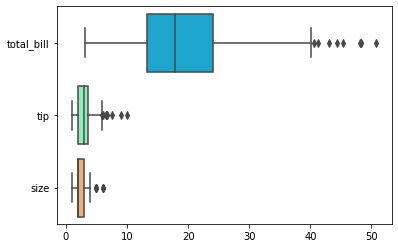

In [28]:
# Can do entire dataframe with orient='h' >> the frequency 
sns.boxplot(data=tips, palette='rainbow', orient='h')

## 2- ViolinPlot (simillar to `boxplot()`)

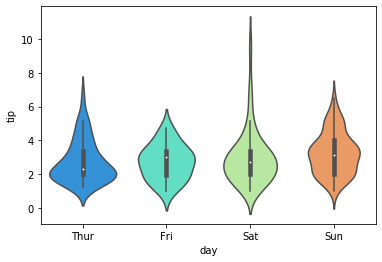

In [29]:
sns.violinplot(x='day', y='tip', data=tips, palette='rainbow')

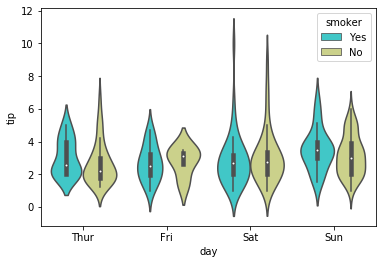

In [30]:
# also you can plot with using a hue much like box plot
sns.violinplot(x='day', y='tip', data=tips, palette='rainbow', hue='smoker')

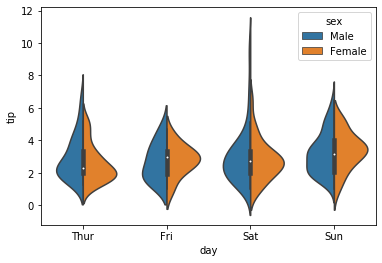

In [31]:
# also you can split the violin different hues (male, female)
sns.violinplot(x='day', y='tip', data=tips, hue='sex', split=True)

## explanation of the Violinplot:
<img src='Explanation-of-Violin-plot.png'/>


## stripplot and swarmplot

The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).


## 1- Stripplot

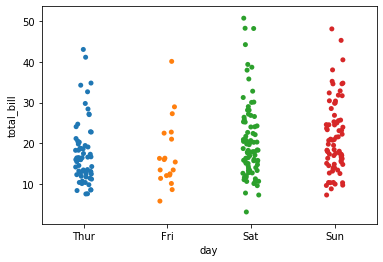

In [32]:
sns.stripplot(x='day', y='total_bill', data=tips)

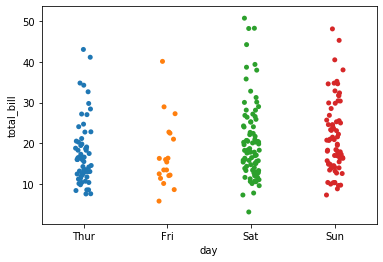

In [33]:
# you can add (jitter=True) to create a noise that make it easier to interpret
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True)

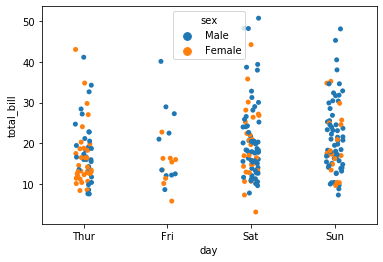

In [34]:
# also you can add a heu with categorical data
sns.stripplot(x='day', y='total_bill', data=tips, hue='sex', jitter=True)

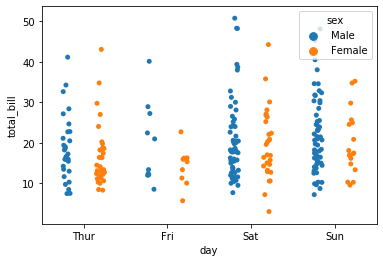

In [35]:
# and also you can split colors in the heu by the following by using dodge argument (split is debricated)
sns.stripplot(x='day', y='total_bill', data=tips, hue='sex', jitter=True, dodge=True)

## 2- Swarmplot

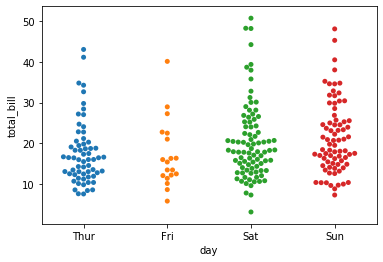

In [36]:
# it is essentially the combination of a (stripplot and violinplot)
sns.swarmplot(x='day', y='total_bill', data=tips)

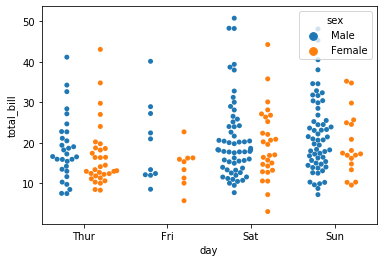

In [37]:
sns.swarmplot(x='day', y='total_bill', data=tips, hue='sex', dodge=True)

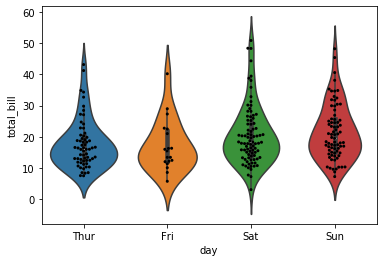

In [38]:
# you can stack a swarmplot on the top of a violinplot to show more inforamtion
sns.violinplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color='black',size=3)

## Finally
## catplot

catplot is the most general form of a categorical plot. It can take in a kind parameter to adjust the plot type:

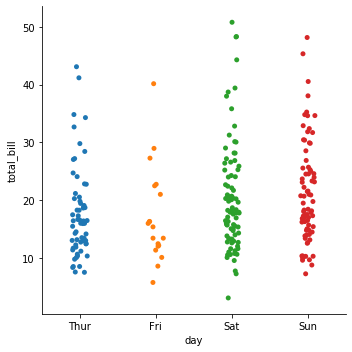

In [39]:
# sns.factorplot() >> depricated instead use catplot
sns.catplot(x='day', y='total_bill', data=tips)

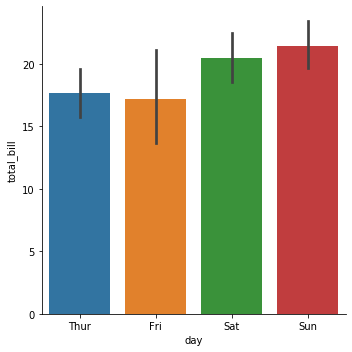

In [40]:
# also you can state different kinds of plots by using the kind argument:
# for example: > "point", "bar", "strip", "swarm", "box", "violin", or "boxen".
sns.catplot(x='day', y='total_bill', data=tips, kind='bar')

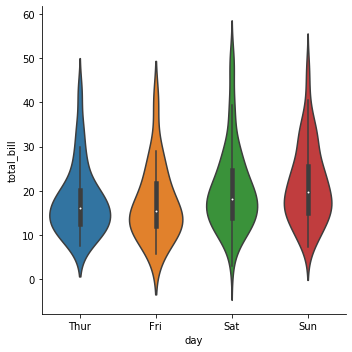

In [41]:
sns.catplot(x='day', y='total_bill', data=tips, kind='violin')

# //////////////////////////////////////////////////////////////////////////////////
# Matrix Plot

# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's begin by exploring seaborn's `heatmap` and `clutermap`:

In [42]:
# Lets start by importing the following datasets:
flights = sns.load_dataset('flights')
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [43]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [44]:
# what is the matrix form of the data >> 
# for example matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


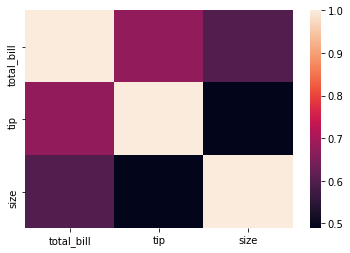

In [45]:
sns.heatmap(tips.corr())

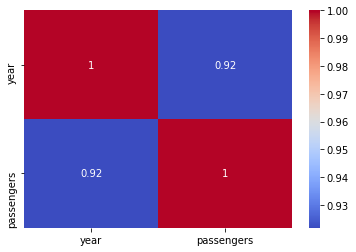

In [46]:
sns.heatmap(flights.corr(), cmap='coolwarm', annot=True)

In [47]:
flights.pivot_table(values='passengers', index='month', columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


In [48]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [49]:
tips.pivot_table(values='total_bill', index='sex', columns='day', aggfunc=np.mean)

day,Thur,Fri,Sat,Sun
sex,,,,
Male,18.714667,19.857000,20.802542,21.887241
Female,16.715312,14.145556,19.680357,19.872222


In [50]:
tips.mode() # the vlaue that occur more frequently

,total_bill,tip,sex,smoker,day,time,size
0,13.42,2.0,Male,No,Sat,Dinner,2


## Now lets Return to the MatrixPlot again

In [51]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [52]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [53]:
# heatmaps is thep primary way of showing matrix plots
# for the heatmap to work properly your data must be in a matrix form. MEANING?
# the column names and the index names must match so that the cell value actually indicates something
# that is relevant to both of those names , the main methods to do so is using corr() or Pivot_table()
# NOTICE THE FOLLOWING EXMAPLE:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


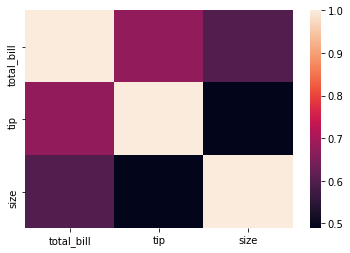

In [54]:
sns.heatmap(tips.corr()) # use the gradient on the side of the heat map to determine the correlation
# Correlation interpretation
# [1-0.5] > strong positive correlation
# [0.5-0] > weak positive correlation
# [-1- -0.5] > strong negative correlation
# [-0.5- 0] > weak negative correlation
# [0] there is no correlation at all

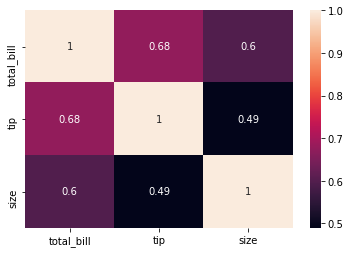

In [55]:
# other useful arguments that you can pass into your heatmap is 
# 'annot=True' and it will annotate the actual value on top of the color
sns.heatmap(data=tips.corr(), annot=True)

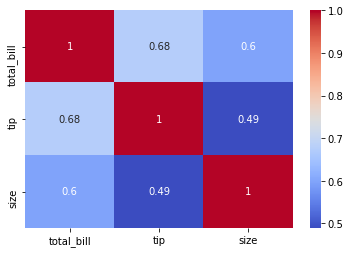

In [56]:
# you also can choose the colormap that you want by using the 'cmap' argument
sns.heatmap(data=tips.corr(), annot=True, cmap='coolwarm')

In [57]:
# now lets plot the heatmap for flghts dataset
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [58]:
# 1- creating a pivot table
flight_pivot_table = flights.pivot_table(index='month', columns='year', values='passengers')

In [59]:
flight_pivot_table

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


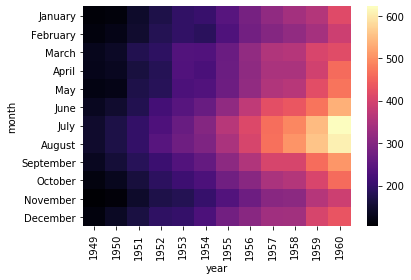

In [60]:
# now lets create the heatmap for the pivot table we just created
sns.heatmap(data=flight_pivot_table, cmap='magma')
plt.tight_layout()

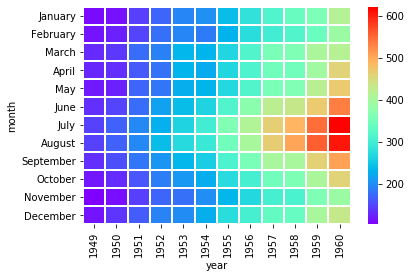

In [61]:
# and if you want to adjust the speration lines (width and color) use the following arguments:
sns.heatmap(data=flight_pivot_table, cmap='rainbow', linecolor='white', linewidths=1)

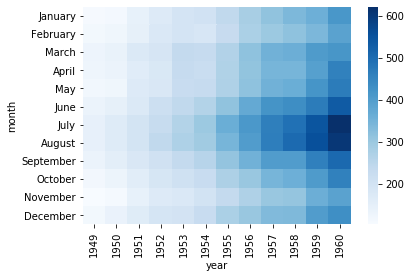

In [62]:
sns.heatmap(flight_pivot_table, cmap='Blues')

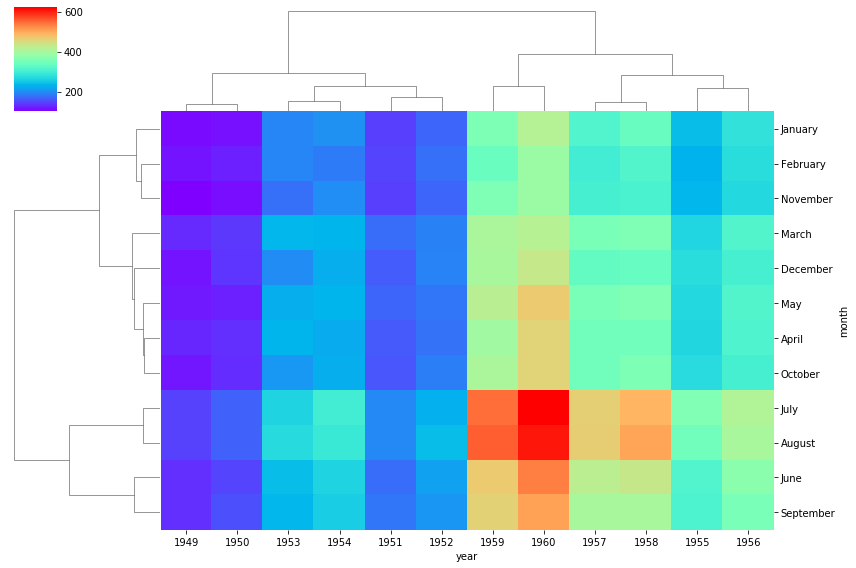

In [63]:
# to cluster the simillar data together we use the 'Clustermap()'
# simillar columns are grouped together and simillar rows to each other.
sns.clustermap(flight_pivot_table, figsize=(12,8), cmap='rainbow')

## `Clustermap`: it organize the data as the simillar columns are grouped together and the simillar rows are grouped together

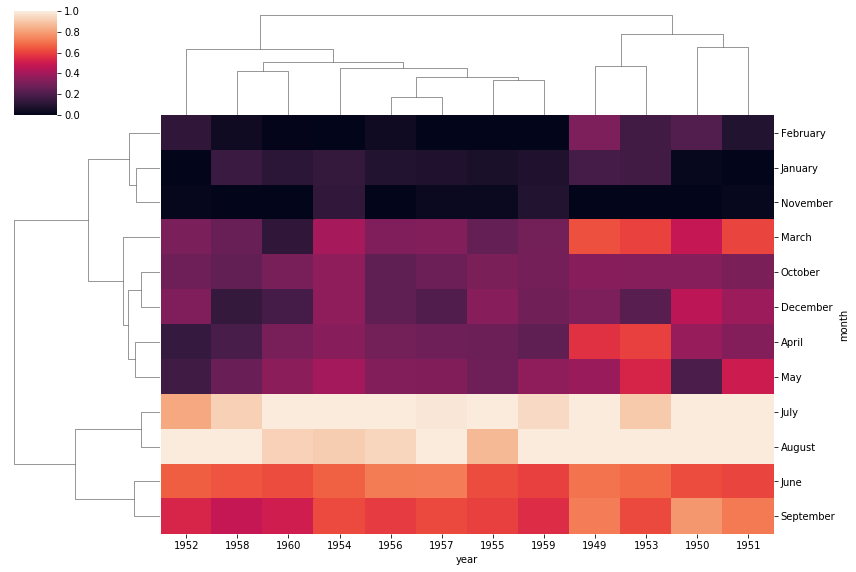

In [64]:
# standerdize the scale to normalize your scale from (0-1)
sns.clustermap(flight_pivot_table, figsize=(12,8),standard_scale=1)

# /////////////////////////////////////////////////////////////////////////
# Grids

Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.


In [65]:
# loading the iris dataset
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


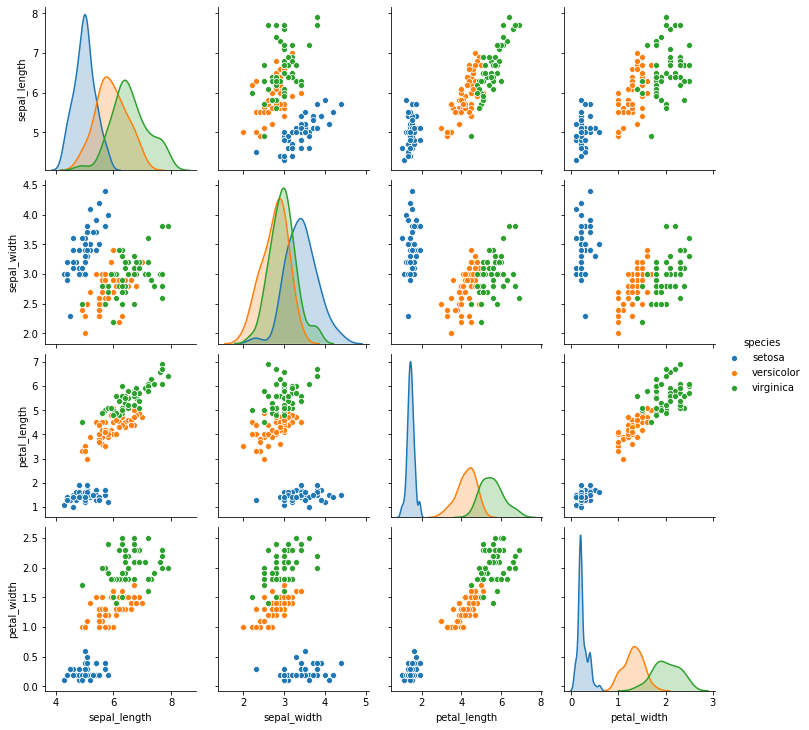

In [66]:
# pairplot is the automated jointplot for all the numerical data
sns.pairplot(data=iris, hue='species') # taking a closer look at the iris dataset using pairplot()

In [67]:
iris.groupby('species').describe().transpose() # using pandas to view different information about the iris dataset

species                setosa  versicolor  virginica
sepal_length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
sepal_width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
petal_length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
petal_width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

## PairGrid

Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.

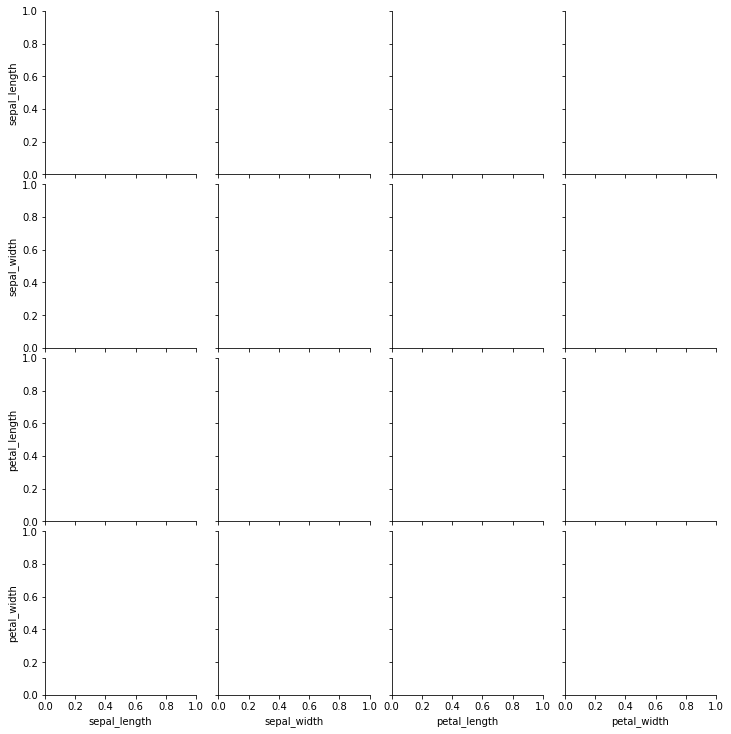

In [68]:
sns.PairGrid(iris) # creates empty subplots of all the numerical features
# it is simmilar to pairplot but it is more powerful and gives you alot of control.

## how to map different plot types to the GridPlot

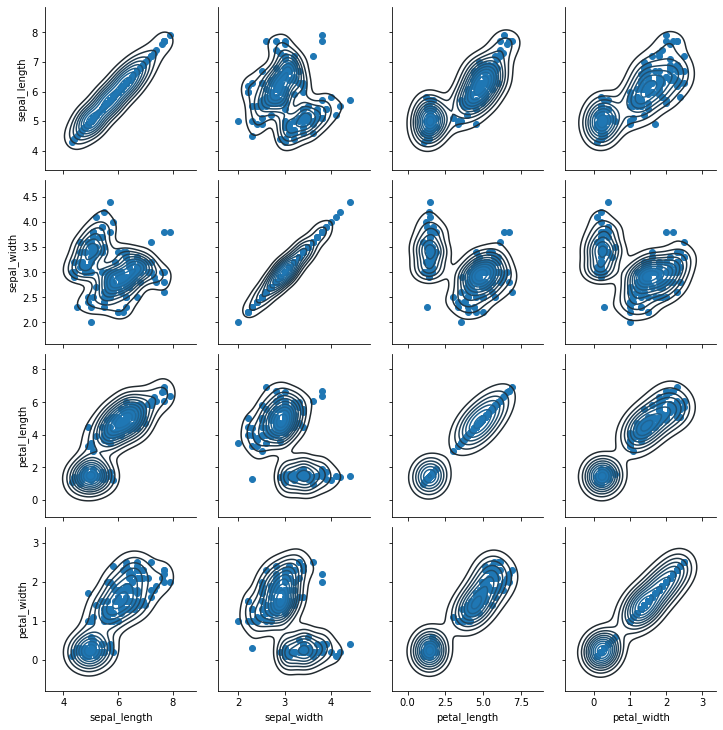

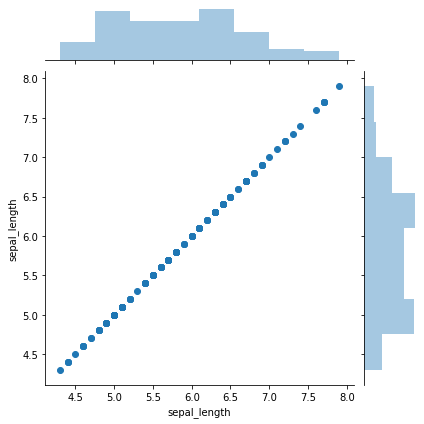

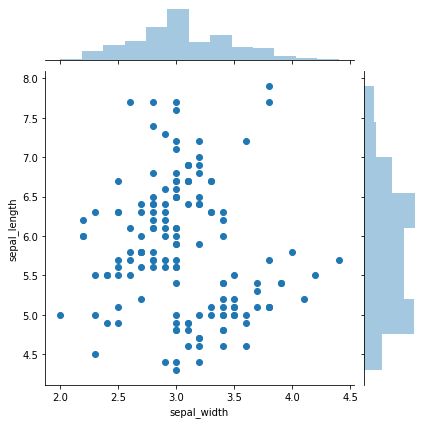

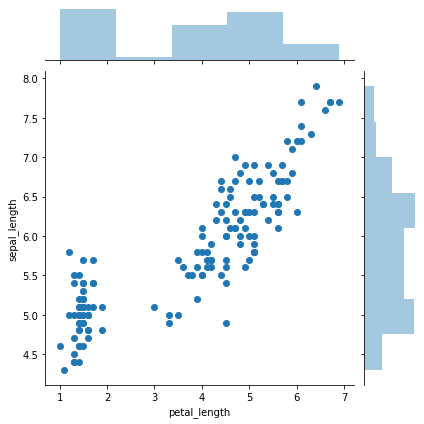

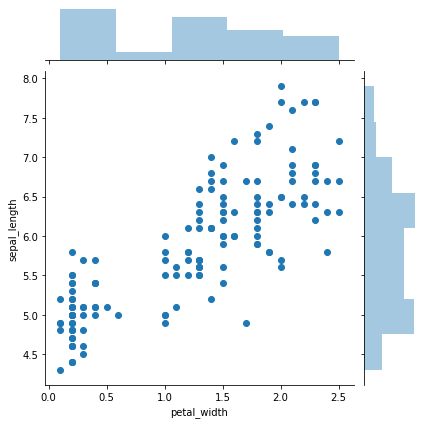

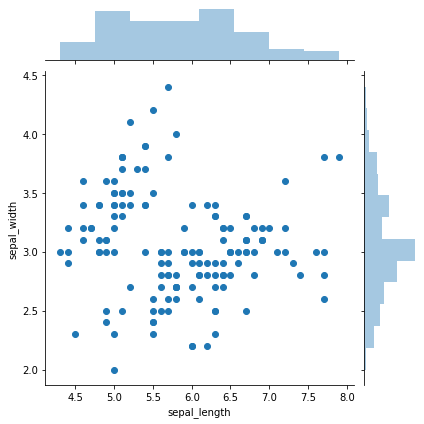

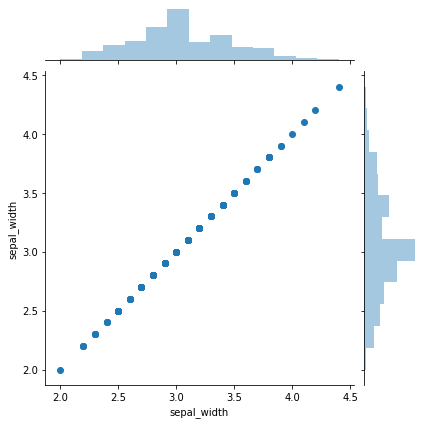

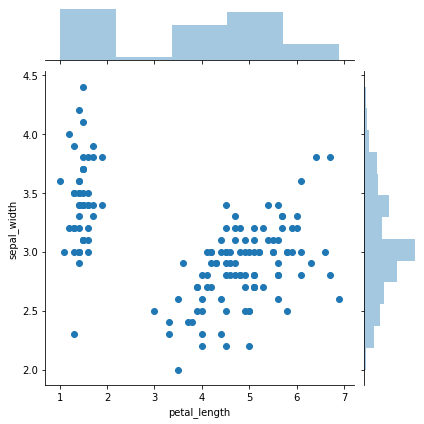

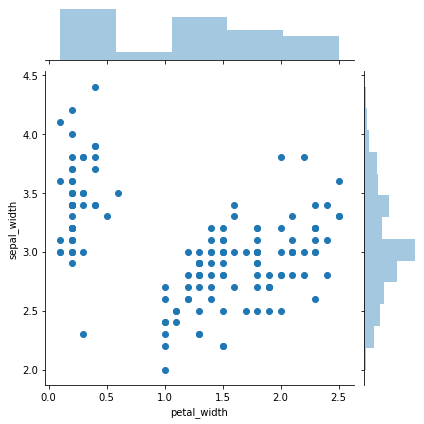

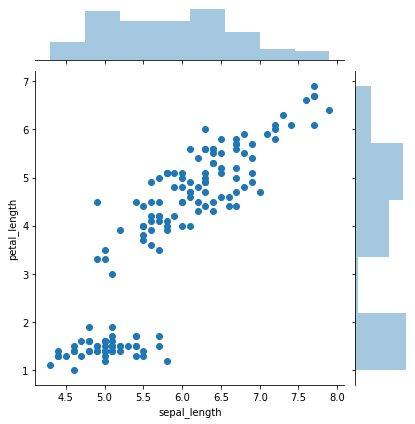

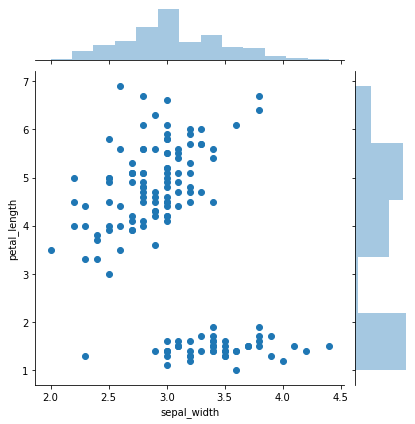

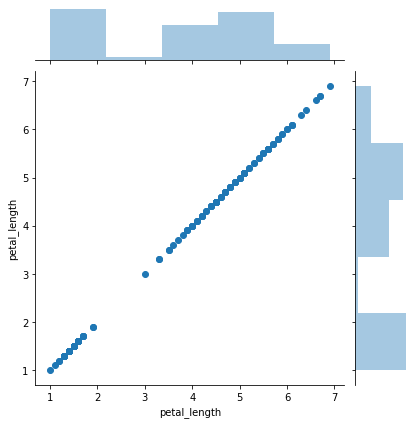

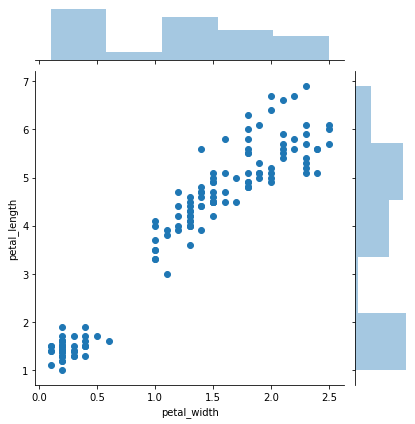

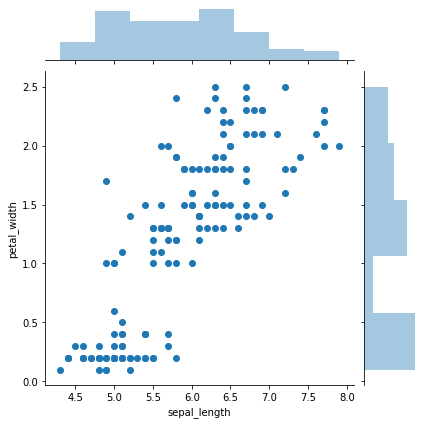

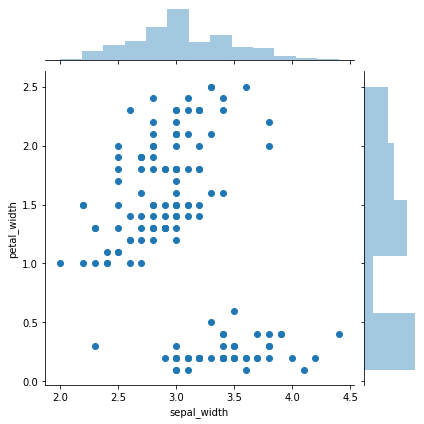

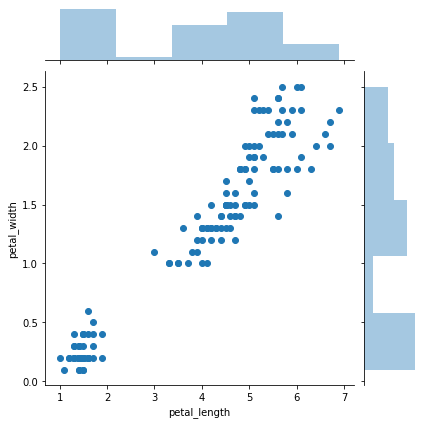

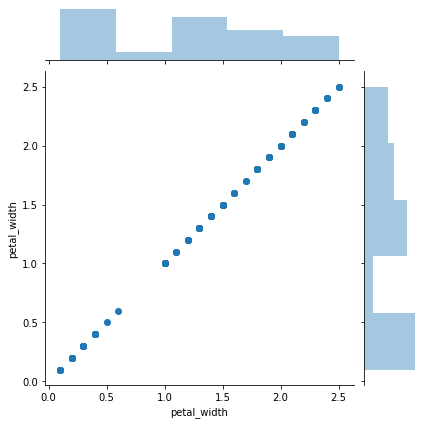

In [69]:
# 1- create object of the PairGrid(dataframe)
g = sns.PairGrid(iris)
# 2- now map your created object 'g' to the plot type you want
g.map(sns.jointplot)
g.map(plt.scatter)
g.map(sns.kdeplot)

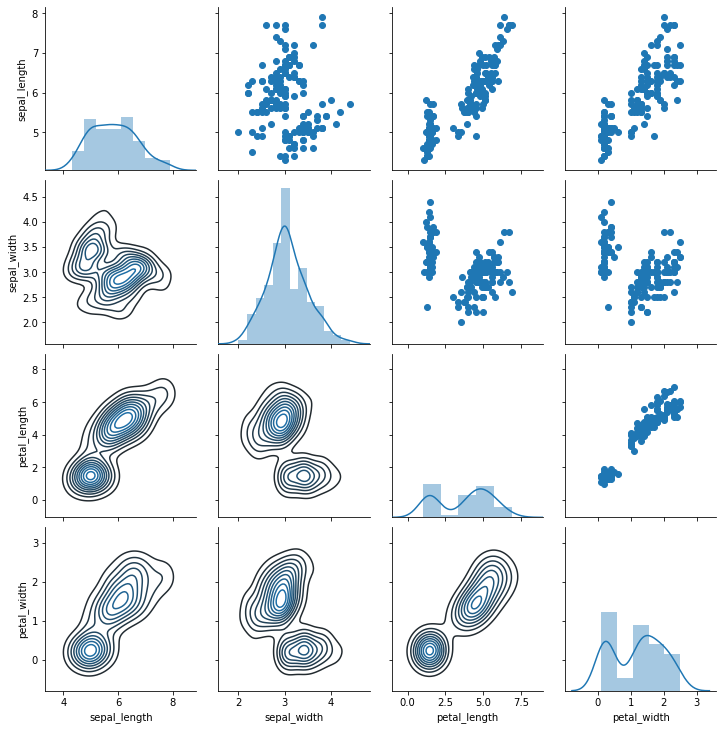

In [70]:
# not only that but you also can map different parts of the subplots in the PlotGrid you created
g = sns.PairGrid(iris)
g.map_diag(sns.distplot) # the diagonal part of the subplots Grid (NOTICE: distplot is used for only one variable 'univariant' and this is the case with the diagonal subplots on the grid).
g.map_upper(plt.scatter) # the upper part of the subplots Grid.
g.map_lower(sns.kdeplot) # the lower part of the subplot Grid.

## pairplot
pairplot is a simpler version of PairGrid (you'll use quite often)

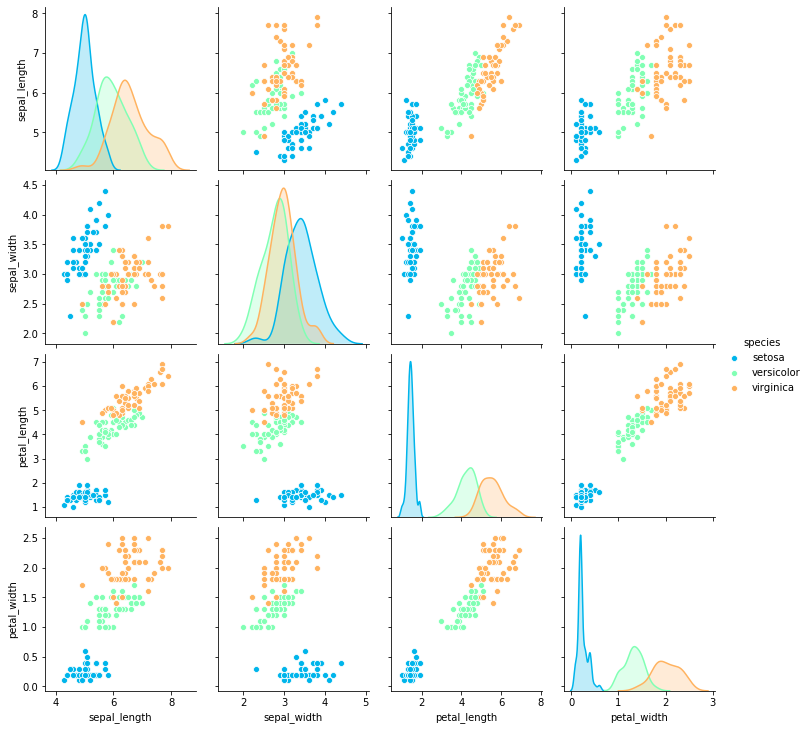

In [71]:
sns.pairplot(iris, hue='species', palette='rainbow')

## Facet Grid
FacetGrid is the general way to create grids of plots based off of a feature:

In [72]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


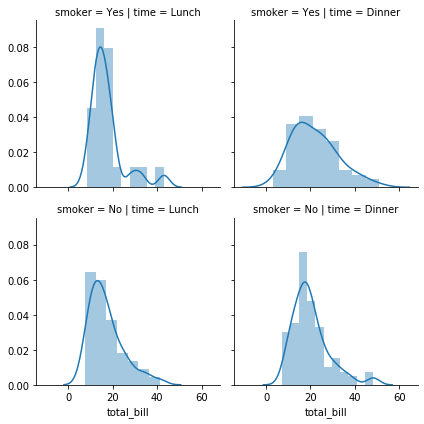

In [73]:
# Facegrid is simillar to the PairGrid but you can create it for a particular set of 
# features and not all of them by specifying the col='', row='' . 
g = sns.FacetGrid(data=tips, col='time', row='smoker')
# lets map a particualr plot to the 'g' object
g.map(sns.distplot, 'total_bill')

### FacetGrid creates a number of grids according to the unique values of the row and columns specified in its object arguments
### then after that we use this object to map different types of plots to that same object (make sure that you pass the approperiate number of values required for the givin plot for example: `sns.distplot` requires one Variable, while `plt.scatter` requires two variables as well as `sns.jointplot`)
### also you can specify a hue)

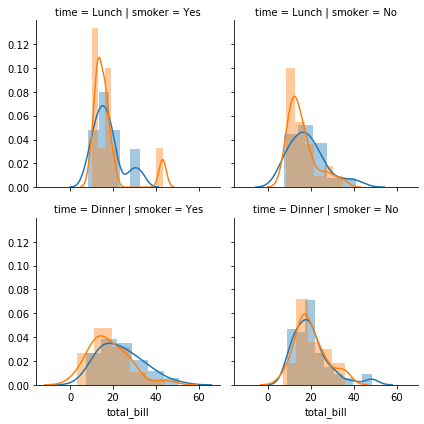

In [77]:
# g = sns.FacetGrid(data=your data frame, row= the row of the dataframe before, col=column from the dataframe before)
g = sns.FacetGrid(data=tips, row='time', col='smoker', hue='sex')
# g.map(sns.distplot, pass the column of the dataframe specified above that you want to plot)
g.map(sns.distplot, 'total_bill')

# /////////////////////////////////////////////////////////////////////////////
# Regression Plots
Seaborn has many built-in capabilities for regression plots, however we won't really discuss regression until the machine learning part, so we will only cover the `lmplot()` function for now.

`lmplot` allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

Let's explore how this works:

In [80]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


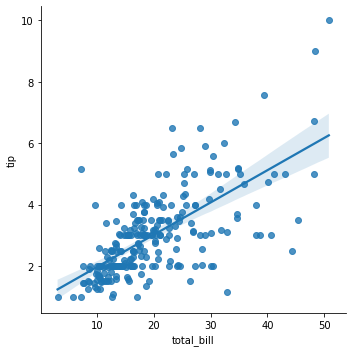

In [81]:
# sns.lmplot(x='feature you want on the x axes', y='feature you want on teh y axes', data='your dataframe', hue='categorical features')
sns.lmplot(x='total_bill', y='tip', data=tips)

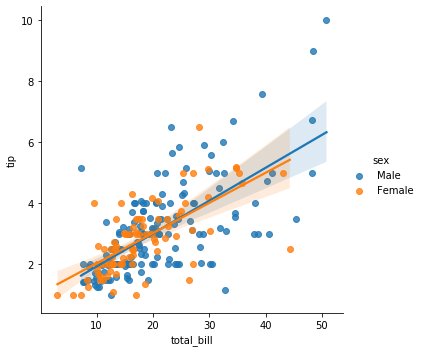

In [82]:
# lets add the hue
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex')

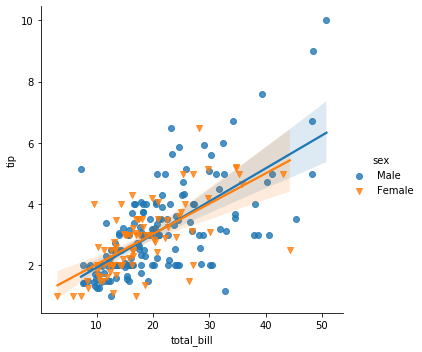

In [83]:
# also you can use matplotlib style parameters like to affect the marker or the marker type
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o', 'v'])

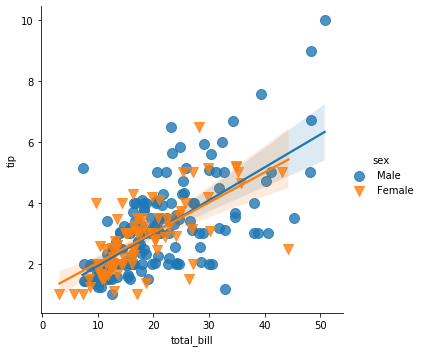

In [84]:
# seaborn uses matplotlib functions under the hood with some tweaks so if you wnat 
# to use the parameters of the matplotlib functions do the following: FunctionName_kws={pass here the matplotlib arguments}
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o', 'v'], scatter_kws={'s':100}) # s: affect the size of the marker

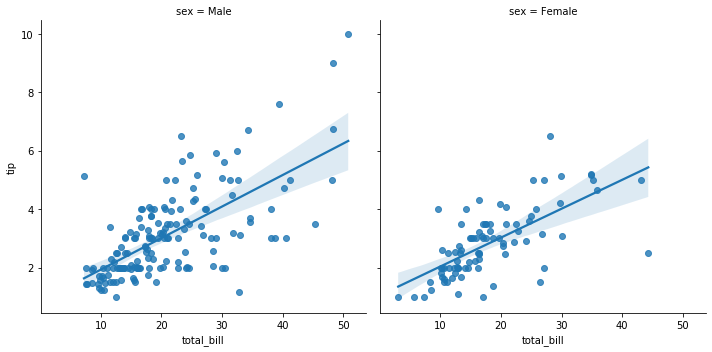

In [87]:
# You can also pass some of FacetGrid argumnets to the lmplot which makes a lot of useful stuff
sns.lmplot(data=tips, x='total_bill', y='tip',col='sex')

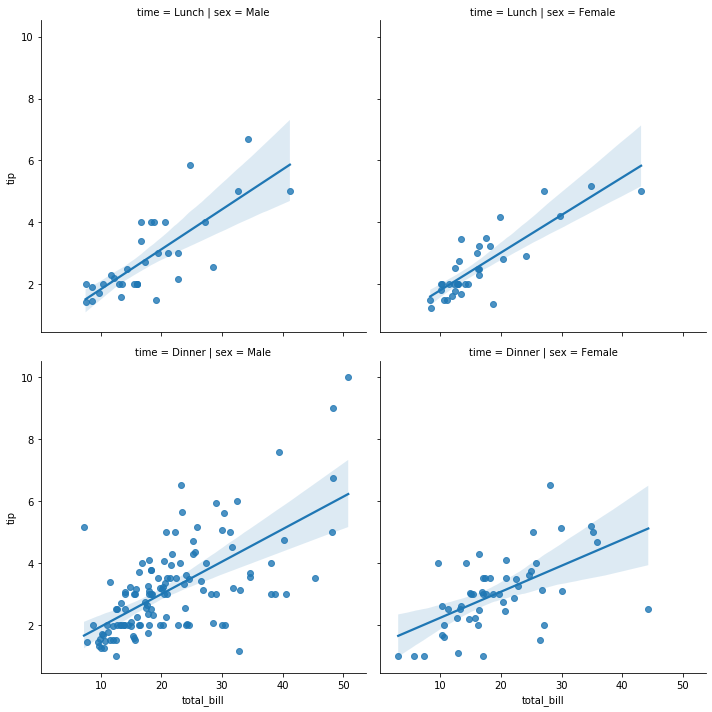

In [88]:
# also you can do the same thing with the row argument
sns.lmplot(data=tips, x='total_bill', y='tip',col='sex', row='time')

### for that you won't need the FacetGrid all the time

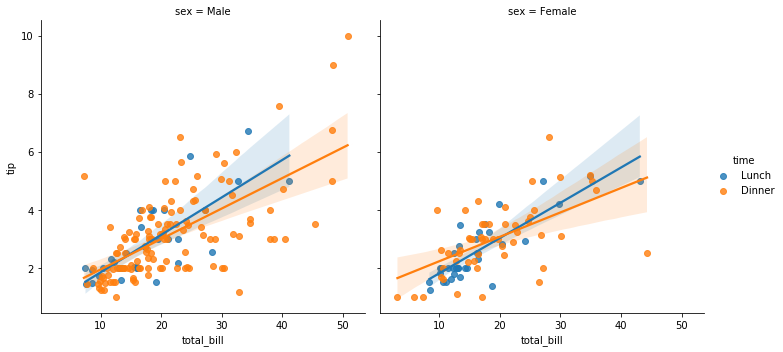

In [94]:
# and also you can add the hue as well:
sns.lmplot(data=tips, x='total_bill', y='tip',col='sex', hue='time')

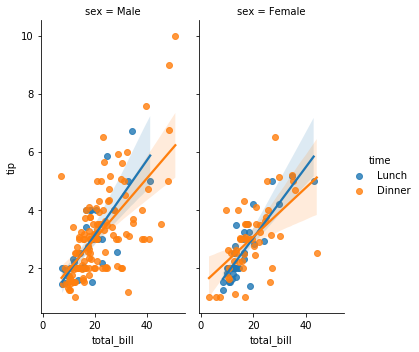

In [103]:
# you also can change the aspect ratio by the aspect arg: which is the aspect ratoi between the height and the width
# (width/height) == Aspect
sns.lmplot(data=tips, x='total_bill', y='tip',col='sex', hue='time', aspect=0.5)

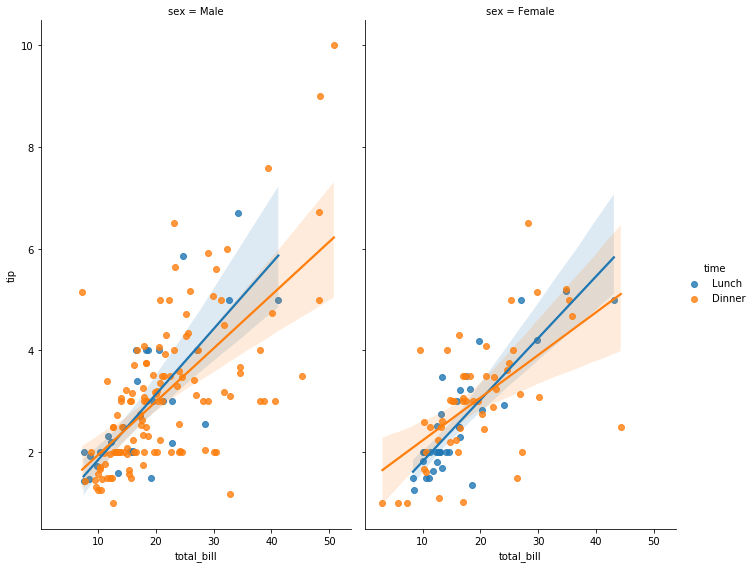

In [108]:
#you can also change the height by using the 'height' arg:
sns.lmplot(data=tips, x='total_bill', y='tip',col='sex', hue='time', aspect=0.6, height=8)

# ////////////////////////////////////////////////////////////////////////////////////////////////
# Style and color
We've shown a few times how to control figure aesthetics in seaborn, but let's now go over it formally:

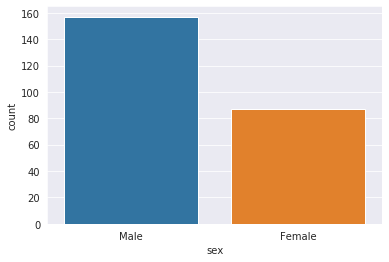

In [116]:
# you can add style by sns.set_style() and add the arg>  
#style: None, darkgrid, whitegrid, dark, white, ticks

sns.set_style(style='darkgrid')
sns.countplot(x='sex', data=tips) # count the number of the males and the no of the females

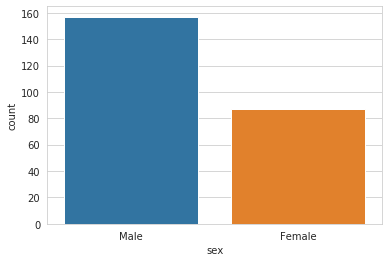

In [118]:
sns.set_style(style='whitegrid')
sns.countplot(x='sex', data=tips)

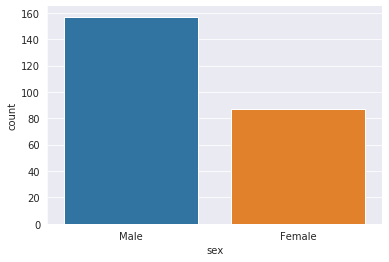

In [127]:
sns.set_style(style='darkgrid')
sns.countplot(x='sex', data=tips)
sns.despine(left=False, bottom=False, top=True, right=True) # controle the apsence of the spines on different positions of your plot

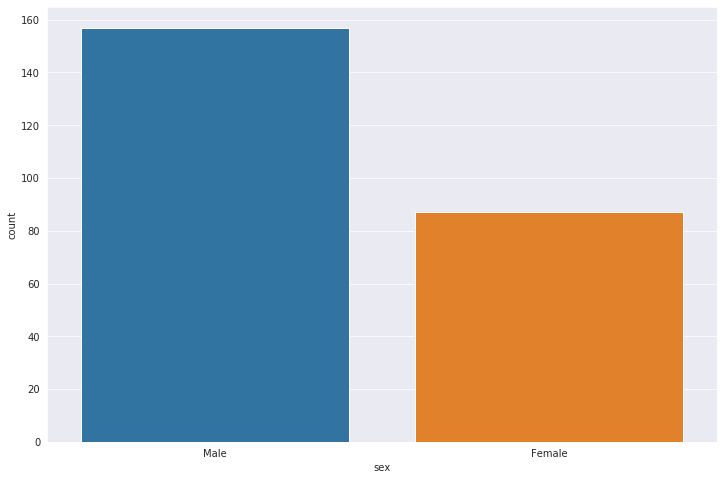

In [128]:
# as we know seaborn use the matplotlib so you can use your matplotlib to write 
# the settings of your plot(figure)
plt.figure(figsize=(12,8))
sns.countplot(x='sex', data=tips)

## Scale and context

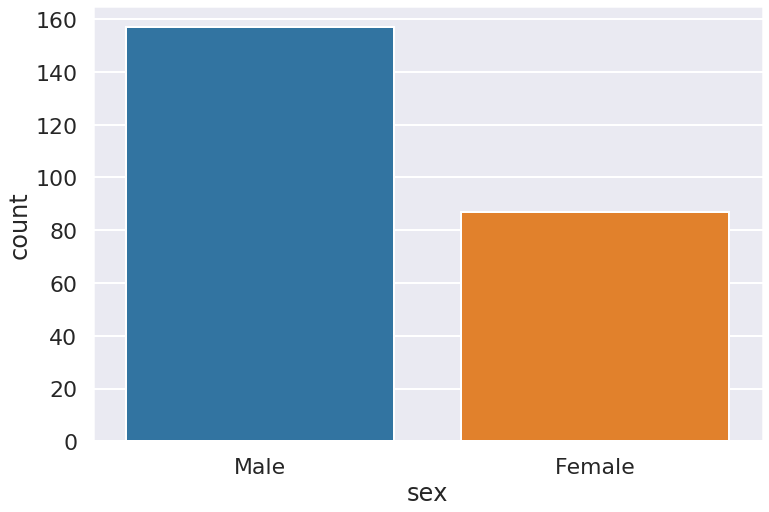

In [132]:
# the context arg takes: paper, notebook, talk, poster, font_scale=1,2,3 times the default
plt.figure(figsize=(12,8))
sns.set_context(context='poster', font_scale=1) # change the context and the font_scale
sns.countplot(data=tips,x = 'sex')

<Figure size 432x288 with 0 Axes>

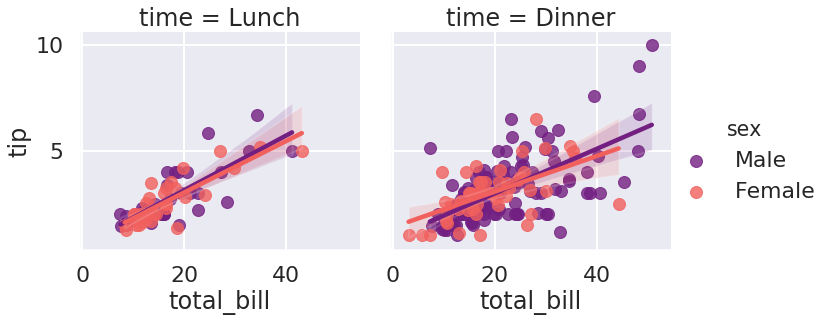

In [136]:
# you can also use the palette arg to change the color
plt.figure(figsize=None)
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', col='time', palette='magma')

### and you can find all the different colormap and paletts on [Matplotlib colormaps reference](https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html)

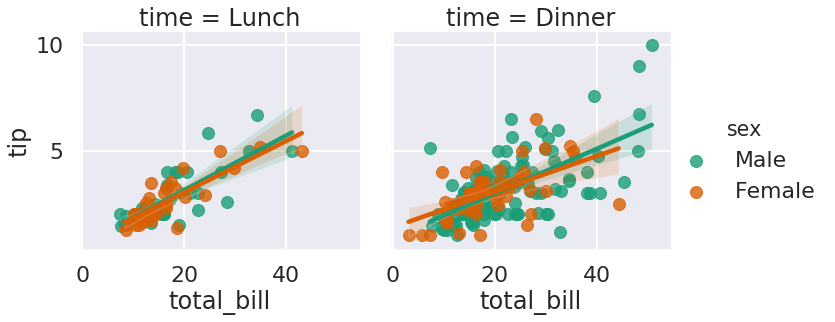

In [138]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', col='time', palette='Dark2')